# 分布

我们这里主要讲 Discrete Distributions，也就是离散（变量）分布。

在这之前我们先介绍一下 allen 做的这个 `empiricaldist` 包：

In [1]:
from empiricaldist import Pmf
import numpy as np 
# Pmf 是 probability mass function

In [2]:
coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


In [3]:
die = Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [4]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [5]:
letters['s']

0.36363636363636365

## 重拾红球与白球问题

我们提到分布是因为这样更方便计算。因为 

$$\text{Posterior distribution} \propto \text{Prior distribution} \times \text{Likelihood distribution}$$

$\propto$ 意思是 proportional to，a 与 b 成比例。之所以「成比例」而不是「等于」是因为 prior 与 likelihood 相乘的结果是未标准化的 posterior。

我们还拿红球与白球来举例；

假设有两只碗:

>碗 1 装着 30 颗红球和 10 颗白球\
>碗 2 装着 20 颗红球和 20 颗白球\
>请问，随机挑一只碗，然后随机抽一个球，假如抽到的是一颗红球，那这颗红球来自碗一的概率是多少？



In [6]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


In [7]:
# Likelihood: 某 hypothesis 的情况下，该 data 的概率
# 在这里，hypothesis 是哪一个碗，data 是我们随机抽一个球，抽到了红球
likelihood_red = [0.75, 0.5]
posterior = prior * likelihood_red
posterior.normalize()
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


假如我们把这颗红球放进去，再 **随机**拿一只碗，随机抽球，又抽到一颗红球，那这颗红球来自两只碗的概率分别是多少？

因为是 **随机** 拿一只碗，那么这一次抽到红球的情况和第一次是一样的，prior 和 likelihood 是一样的，因此 posterior 也是一样的。

但是，假如我们把这颗红球放进去，在**同一只碗**中随机抽球，又抽到一颗红球，那这颗红球来自两只碗的概率分别是多少？

这时候情况就不同了，prior （碗是哪只碗）不再是对半开了。因为第一次抽完后，我们知道这颗红球来自碗一的概率是 $0.6$，来自碗二的概率是 $0.4$。第二次是在「同一只碗」中随机抽球，那这只碗是哪只碗，也就是 prior，是第一次抽中红球的 posterior。另外，第二次时的 likelihood 是一样的。

因此：

In [8]:
posterior *= likelihood_red
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


好，我们继续。第三次，把球放回，在 **同一只碗** 中继续抽，抽到一颗白球，那这颗白球分别来自两只碗的概率是多少？

第三次的 prior 依然是「同一只碗」是哪只碗的问题，也就是第二次的 posterior。Likelihood 变了，变成了 `likelihood_white`。我们接着计算：

In [9]:
likelihood_white = [0.25, 0.5]
posterior *= likelihood_white
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


## 一百零一只碗

- 碗 0 中 0% 是红球
- 碗 1 中 1% 是红球
- 碗 2 中 2% 是红球\
...
- 碗 99 中 99% 是红球
- 碗 100 中 100% 是红球

每一只碗中不是红球就是白球。我们随机抽一只碗，从中随机抽一个球，抽到了一颗红球，请问这颗红球来自碗 $x$ 的概率是多少？

![](media/balls.png)

我们来分析：

- hypothesis: 碗 $x$
- data: 随机抽一只碗，随机抽一颗球，抽到了红球
- prior: $p(h)$
- likelihood: $p(d|h)$
- posterior: $p(h|d)$

In [10]:
# bowls = [f'Bowl {n}' for n in range(101)]
prior = Pmf.from_seq([n for n in range(101)])
likelihood_red = [(n/100) for n in range(101)]
posterior = prior * likelihood_red
posterior.normalize()
posterior.head()

,probs
0,0.000000
1,0.000198
2,0.000396


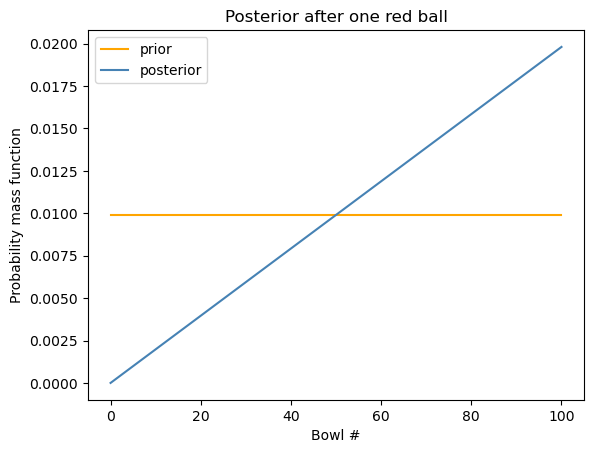

In [11]:
import matplotlib.pyplot as plt 
prior.plot(label="prior", color="orange")
posterior.plot(label="posterior", color="steelblue")
plt.xlabel("Bowl #")
plt.ylabel("Probability mass function")
plt.legend()
plt.title("Posterior after one red ball")
plt.show()

假如我们把红球放回，从 **同一只碗** 中再次随机抽球，我们又抽到了一颗红球，请问这第二颗红球来自碗 $x$ 的概率是多少？

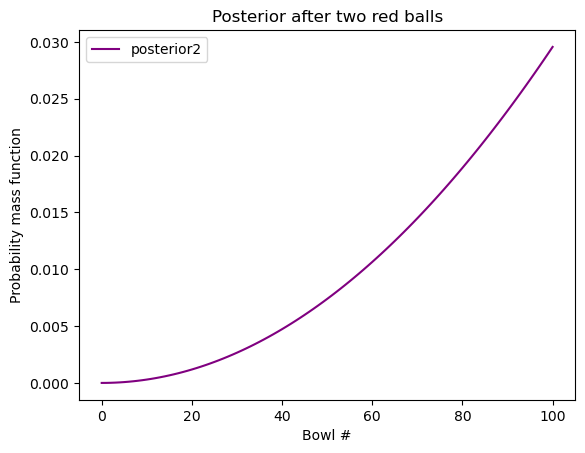

In [12]:
posterior2 = posterior * likelihood_red
posterior2.normalize()
posterior2.plot(label="posterior2", color="purple")
plt.xlabel("Bowl #")
plt.ylabel("Probability mass function")
plt.legend()
plt.title("Posterior after two red balls")
plt.show()

接着，我们把红球放回，在 **同一只碗** 中再次随机抽球，这次我们抽到了一颗白球，请问这第三颗白球来自碗 $x$ 的概率是多少？

这时的 prior 仍是关于「碗」的。这里说了是「同一只碗」，但我们并不确定同一只碗到底是哪只碗，这是由第二次抽取决定的。第二次的 posterior 就是我们这次的 prior。

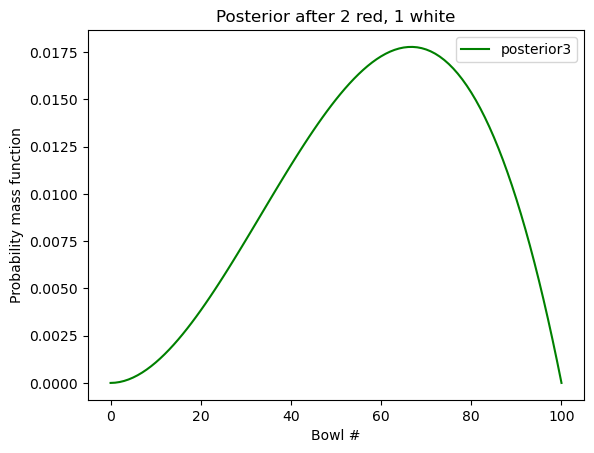

In [13]:
likelihood_white = [1 - x for x in likelihood_red]
posterior3 = posterior2 * likelihood_white
posterior3.normalize()
posterior3.plot(label="posterior3", color="green")
plt.xlabel("Bowl #")
plt.ylabel("Probability mass function")
plt.legend()
plt.title("Posterior after 2 red, 1 white")
plt.show()

这里，PMF (probability mass function) 的最高点叫做 "maximum a posterior probability" (MAP).

如果我们想知道这里的最高点是哪一只碗：

In [14]:
posterior3.idxmax(), posterior3.max_prob()

(67, 67)

## 顺序重要吗？

我们看到 `posterior3` 是如此得出的：

```py
posterior = prior * likelihood_red
posterior.normalize()
posterior2 = posterior * likelihood_red
posterior2.normalize()
posterior3 = posterior2 * likelihood_white
posterior3.normalize()
```

我们注意到每次我们都用到了 `normalize()`，但这大可不必，只需要最后一次，也就是 `posterior3.normalize()` 即可。为什么呢？

我们先用数学公式证明一下。这里 prior, likelihood_red, likelihood_white, 和每个 posterior 都是一组数。

我们需要证明的是上面算出来的 posterior3 和下面算出来的应该是一样的：

```
posterior3_new = prior * likelihood_red * likelihood_red * likelihood_white
posterior3_new.normalize()
```

那我们就来看一下：


In [15]:
posterior3.head()

,probs
0,0.000000
1,0.000012
2,0.000047


In [16]:
posterior3_new = prior * likelihood_red * likelihood_red * likelihood_white
posterior3_new.normalize()
posterior3_new.head()

,probs
0,0.000000
1,0.000012
2,0.000047


In [17]:
np.isclose(posterior3, posterior3_new)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

我们看到，结果是一样的。也就是说，只需要最后一次 normalize 即可。

其实，这可以从数学上证明

$$
a = [a_1, a_2, a_3] \\
b = [b_1, b_2, b_3] \\
c = [c_1, c_2, c_3]
$$

a、b、c 是三组数。每个数都在 $[0,1]$ 这个区间。我们用 $N(a)$ 表示对一组数标准化，也就是每个数除以该组数之和。数学上我们可以证明

$$N(N(N(a)*b)*c) = N(a*b*c)$$

注意：

$$a*b = [a_1 * b_1, a_2 * b_2, a_3 * b_3]$$

数学上的证明我就不给了。感兴趣的同学可以自己去证明一下。我们现在用 python 模拟：

In [18]:
a = np.random.rand(3)
b = np.random.rand(3)
c = np.random.rand(3)
a_norm = a/a.sum()
d = a_norm * b 
d_norm = d/d.sum()
e = d_norm * c
e_norm = e/e.sum()
e_norm

array([0.1486533 , 0.62948666, 0.22186004])

In [19]:
f = a*b*c
f_norm = f/f.sum()
f_norm

array([0.1486533 , 0.62948666, 0.22186004])

其实，`normalize()` 想有几个就可以有几个，而且位置随意，结果都是一样的。这是因为，只要最后的结果是 noramalized，那么不管中间多少次 normalize，都是一组数乘以一个相同的数，那这个结果 normalize 后和 f_norm 都是相同的：

In [20]:
b_norm = b/b.sum()
g = a_norm * b_norm * c 
g_norm = g/g.sum()
g_norm

array([0.1486533 , 0.62948666, 0.22186004])

In [21]:
c_norm = c/c.sum()
h = a_norm * b_norm * c_norm 
h_norm = h/h.sum()
h_norm

array([0.1486533 , 0.62948666, 0.22186004])

因此，posterior3 也可以这么算：

```py
posterior3 = prior * likelihood_red * likelihood_red * likelihood_white
posterior3.normalize()
```

如果这样的话，也就是说，球的顺序不重要，只要总量一样就好。故而，红-红-白 与 红-白-红、白-红-红 的结果是一样的。

## 总结
我们把一百零一只碗这个问题泛化一下：

- 碗 0 中 0/n 是红球
- 碗 1 中 1/n 是红球
- 碗 2 中 2/n 是红球\
...
- 碗 n 中 n/n 是红球

每一只碗中不是红球就是白球，且每只碗中球的总数相同。我们随机取一只碗，有放回地在这只碗中抽取球。我们把事件 T 定义为：

>共抽取 m 次，其中抽中红球 r 次，白球 w 次

那么事件 T 发生的概率是多少？

In [22]:
def update_bowls_pmf(n, r, w):
    """
    n: 总共几只碗
    r: 红球
    w: 白球
    """
    priors = Pmf.from_seq([i for i in range(n)])
    likelihood_red = [i/(n-1) for i in range(n)]
    likelihood_white = [1- i for i in likelihood_red]
    likelihood = {
        "red": likelihood_red,
        "white": likelihood_white
    }
    dataset = ["red"]*r + ["white"]*w
    for data in dataset:
        priors *= likelihood[data]
        priors.normalize()
    return priors


In [23]:
# 我们来检测一下 红-红-白 是否和最原始的计算结果一致：
new_posterior = update_bowls_pmf(n=101, r=2, w=1)
np.isclose(new_posterior, posterior3_new)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

### 惊天大逆转

你可能会问，上面的方法有什么用。那我问你另一个问题。假设，我不告诉你这些碗，只说这些：

>从一只装有红球和白球的碗中，随机有放回地抽球，每次抽一颗，抽了三次，这三次的结果是：红球，红球，白球。请问这只碗中的红球比例最有可能是多少？

你就会知道，上面的结果可以回答这个问题。

当然你也可以如此解决：

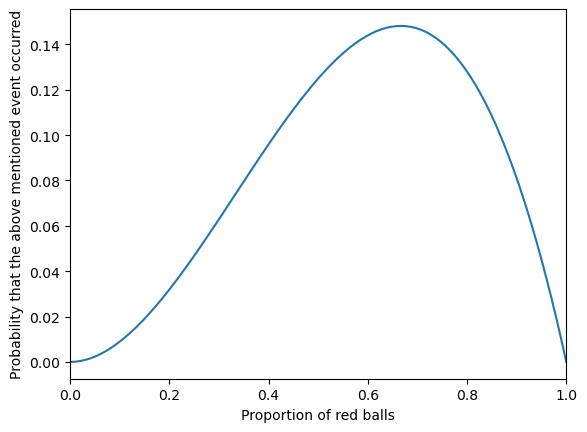

In [24]:
def y(x):
    # 假设红球比例是x
    return x**2*(1-x)
x = np.linspace(0, 1, 100)
plt.plot(x, y(x))
plt.xlabel("Proportion of red balls")
plt.ylabel("Probability that the above mentioned event occurred")
plt.xlim(0, 1)
plt.show()

In [25]:
from scipy.optimize import minimize_scalar
def y(x):
    return -x**2*(1-x)
result = minimize_scalar(y, bounds=(0,1), method="bounded")
result

 message: Solution found.
 success: True
  status: 0
     fun: -0.14814814814787028
       x: 0.666666139518174
     nit: 10
    nfev: 10

In [26]:
# 所以结果是：
max_value = -result.fun
optimal_x = result.x 
optimal_x, max_value

(0.666666139518174, 0.14814814814787028)

也就是说，当红球比例是 $66.7\%$ （也就是 $\frac{2}{3}$） 时，上述事件发生的概率最高，而上述事件已经发生了，因此红球的概率最有可能是 $66.7\%$。